*** After getting Data from data.gov.in or my github link ***
#importing the required libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


loading the csv file as a data frame and seeing the snap of it

In [2]:
df = pd.read_csv("productconsumption.csv")
print(df.head())

    Month  Year PRODUCTS  Quantity (000 Metric Tonnes) updated_date
0  August  2023      ATF                        676.75   2024-01-03
1    July  2023      ATF                        663.23   2024-01-03
2    June  2023      ATF                        642.33   2024-01-03
3     May  2023      ATF                        670.58   2024-01-03
4   April  2023      ATF                        655.98   2024-01-03


Converying the month data as per our requirement

In [3]:
df['Month'] = df['Month'].str.slice(stop=3)
print(df.head())

  Month  Year PRODUCTS  Quantity (000 Metric Tonnes) updated_date
0   Aug  2023      ATF                        676.75   2024-01-03
1   Jul  2023      ATF                        663.23   2024-01-03
2   Jun  2023      ATF                        642.33   2024-01-03
3   May  2023      ATF                        670.58   2024-01-03
4   Apr  2023      ATF                        655.98   2024-01-03


creating a new date column to make it as index and droping the existing columns to reduce the clutter

In [4]:
df['Month'] = pd.to_datetime(df['Month'], format='%b')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Date'] = df.apply(lambda row: row['Year'].replace(month=row['Month'].month), axis=1)

df = df.drop(['Month','Year',"updated_date"],axis=1)
print(df.head())

  PRODUCTS  Quantity (000 Metric Tonnes)       Date
0      ATF                        676.75 2023-08-01
1      ATF                        663.23 2023-07-01
2      ATF                        642.33 2023-06-01
3      ATF                        670.58 2023-05-01
4      ATF                        655.98 2023-04-01


using pivot tables to change the structure of data as required here each products should represent in indvidiual column

In [8]:
pivot_df  = df.pivot_table(index = "Date" ,columns='PRODUCTS',values="Quantity (000 Metric Tonnes)")


In [9]:
print(pivot_df)

PRODUCTS       ATF  Bitumen  FO & LSHS      HSD     LDO      LPG  \
Date                                                               
2020-04-01   55.00   187.00     283.00  3252.00   28.00  2113.00   
2020-05-01  110.00   590.00     469.00  5494.00   71.00  2296.00   
2020-06-01  222.00   751.00     466.00  6299.00   63.00  2064.00   
2020-07-01  233.00   414.00     469.00  5506.00   62.00  2258.00   
2020-08-01  256.00   270.00     458.00  4843.00   62.00  2262.00   
2020-09-01  313.00   415.00     452.00  5487.00   65.00  2261.00   
2020-10-01  360.00   640.00     480.00  7001.00   69.00  2421.00   
2020-11-01  376.00   717.00     483.00  7039.00   69.00  2352.00   
2020-12-01  427.00   856.00     529.00  7192.00   88.00  2523.00   
2021-01-01  441.00   821.00     516.00  6806.00   87.00  2490.00   
2021-02-01  432.00   853.00     476.00  6569.00   80.00  2262.00   
2021-03-01  474.00  1012.00     507.00  7225.00  112.00  2256.00   
2021-04-01  411.76   818.11     517.31  6675.63 

In [ ]:
Sorting the dataframe to get the neat timeline view

In [10]:
sorted_df = pivot_df.sort_values(by="Date")

In [11]:
print(sorted_df)

PRODUCTS       ATF  Bitumen  FO & LSHS      HSD     LDO      LPG  \
Date                                                               
2020-04-01   55.00   187.00     283.00  3252.00   28.00  2113.00   
2020-05-01  110.00   590.00     469.00  5494.00   71.00  2296.00   
2020-06-01  222.00   751.00     466.00  6299.00   63.00  2064.00   
2020-07-01  233.00   414.00     469.00  5506.00   62.00  2258.00   
2020-08-01  256.00   270.00     458.00  4843.00   62.00  2262.00   
2020-09-01  313.00   415.00     452.00  5487.00   65.00  2261.00   
2020-10-01  360.00   640.00     480.00  7001.00   69.00  2421.00   
2020-11-01  376.00   717.00     483.00  7039.00   69.00  2352.00   
2020-12-01  427.00   856.00     529.00  7192.00   88.00  2523.00   
2021-01-01  441.00   821.00     516.00  6806.00   87.00  2490.00   
2021-02-01  432.00   853.00     476.00  6569.00   80.00  2262.00   
2021-03-01  474.00  1012.00     507.00  7225.00  112.00  2256.00   
2021-04-01  411.76   818.11     517.31  6675.63 

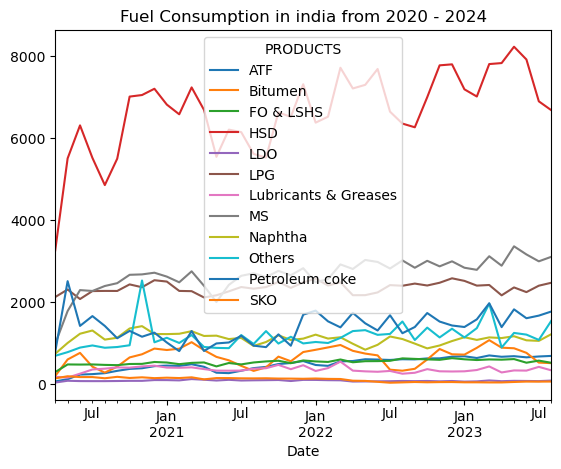

In [24]:
sorted_df.plot(kind = "line" ,  y=['ATF', 'Bitumen', 'FO & LSHS', 'HSD', 'LDO', 'LPG',
       'Lubricants & Greases', 'MS', 'Naphtha', 'Others', 'Petroleum coke',
       'SKO'])
plt.title("Fuel Consumption in india from 2020 - 2024")
plt.show()

In [23]:
sorted_df['SKO']

Date
2020-04-01    129.00
2020-05-01    181.00
2020-06-01    161.00
2020-07-01    161.00
2020-08-01    132.00
2020-09-01    167.00
2020-10-01    139.00
2020-11-01    155.00
2020-12-01    135.00
2021-01-01    146.00
2021-02-01    137.00
2021-03-01    155.00
2021-04-01    105.33
2021-05-01    136.39
2021-06-01    136.15
2021-07-01    130.26
2021-08-01    128.74
2021-09-01    131.71
2021-10-01    124.51
2021-11-01    123.39
2021-12-01    119.47
2022-01-01    126.17
2022-02-01    117.07
2022-03-01    114.18
2022-04-01     72.28
2022-05-01     67.70
2022-06-01     45.29
2022-07-01     23.24
2022-08-01     31.55
2022-09-01     40.97
2022-10-01     33.56
2022-11-01     38.47
2022-12-01     39.73
2023-01-01     33.31
2023-02-01     33.27
2023-03-01     30.20
2023-04-01     30.35
2023-05-01     41.52
2023-06-01     51.11
2023-07-01     49.87
2023-08-01     52.00
Name: SKO, dtype: float64

In [29]:
sorted_df.to_csv('Downloads/Fuel_consumption.csv', index=True)